# I am using the Heart Disease data set from the UCI repository to predict whether people develop heart disease. 

### In lieu of using the available processed data with 14 attributes in CSV format, I am starting with the complete dataset of 76 attributes. 

   #### Task1: Put data in dataframe and remove irrelevant columns. 
   #### Task2: Look for NaNs or missing values. Missing value imputation if needed. 
   #### Task3: Explore data - see which fetaures are relevant. 
   #### Task4: Check for imbalanced class set. If present, deal with this. 
   #### Task5: Exploring models 
   #### Task6: Hyperparameter optimization - fine tuning the selected model.
   #### Task7: Test the selected model

### Task 1 Getting data together

In [76]:
import io
import requests
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data = r.text.replace('\n', ' ').replace(' name ', ' name\n')

hungary = pd.read_table(io.StringIO(data), sep='\s+', header=None)
print(hungary)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    1254   0  40   1   1   0   0  -9   2  140  ...   -9  -9   1   1   1   1   
1    1255   0  49   0   1   0   0  -9   3  160  ...   -9  -9   1   1   1   1   
2    1256   0  37   1   1   0   0  -9   2  130  ...   -9  -9   1   1   1   1   
3    1257   0  48   0   1   1   1  -9   4  138  ...    2  -9   1   1   1   1   
4    1258   0  54   1   1   0   1  -9   3  150  ...    1  -9   1   1   1   1   
5    1259   0  39   1   1   0   1  -9   3  120  ...   -9  -9   1   1   1   1   
6    1260   0  45   0   0   1   0  -9   2  130  ...   -9  -9   1   1   1   1   
7    1261   0  54   1   1   0   0  -9   2  110  ...   -9  -9   1   1   1   1   
8    1262   0  37   1   1   1   1  -9   4  140  ...   -9  -9   1   1   1   1   
9    1263   0  48   0   1   0   0  -9   2  120  ...   -9  -9   1   1   1   1   
10   1264   0  37   0   1   0   1  -9   3  130  ...   -9  -9   1   1   1   1   
11   1265   0  58   1   1   0   0  -9   

In [77]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data1 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

lb = pd.read_table(io.StringIO(data1), sep='\s+', header=None)
print(lb)

      0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0      1   0  63   1   1   1   1  -9   4  140  ...    2   1   1   1   1   1   
1      2   0  44   1   1   1   1  -9   4  130  ...    1   1   1   1   1   1   
2      3   0  60   1   1   1   1  -9   4  132  ...    2   1   1   1   1   7   
3      4   0  55   1   1   1   1  -9   4  142  ...    1   1   1   1   1   1   
4      5   0  66   1   1   0   0  -9   3  110  ...    1   1   1   1   1   1   
5      6   0  66   1   1   0   1  -9   3  120  ...    1   1   1   1   1   1   
6      7   0  65   1   1   1   1  -9   4  150  ...    2   2   1   1   1   7   
7      8   0  60   1   1   0   0  -9   3  180  ...    1   1   1   1   1   1   
8      9   0  60   1   1   0   1  -9   3  120  ...    2   1   1   1   1   1   
9     10   0  60   1   0   0   0  -9   2  160  ...    1   1   1   1   1   1   
10    11   0  56   1   1   0   0  -9   2  126  ...    1   1   1   1   1   1   
11    12   0  59   1   1   1   1  -9   4  140  ...  

In [78]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data2 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

switz = pd.read_table(io.StringIO(data2), sep='\s+', header=None)
print(switz)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    3001   0  65   1   1   1   1  -9   4  115  ...    1   1   1   1   1   1   
1    3002   0  32   1   0   0   0  -9   1   95  ...    1   1   1   1   1   5   
2    3003   0  61   1   1   1   1  -9   4  105  ...    2   1   1   1   1   1   
3    3004   0  50   1   1   1   1  -9   4  145  ...    1   1   1   1   1   5   
4    3005   0  57   1   1   1   1  -9   4  110  ...    2   1   1   1   1   1   
5    3006   0  51   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
6    3007   0  47   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
7    3008   0  60   1   1   1   1  -9   4  160  ...    1   2  -9  -9  -9  -9   
8    3009   0  55   1   0   0   0  -9   2  140  ...    1   1   1   1   1   1   
9    3010   0  53   1   1   1   1  -9   4  125  ...    1   1   1   1   1   1   
10   3011   0  62   0   1   1   1  -9   4  120  ...    1   1   1   1   1   1   
11   3012   0  51   1   1   1   1  -9   

In [79]:
col_list = [2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57]
            
hungary=hungary[col_list]
lb = lb[col_list]
switz=switz[col_list]

In [80]:
switz.head(5) #Just checking to see I cut this down correctly

,2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57
0,65,1,4,115,0,-9,0,-9,-9,0,93,56,185,80,1,0.0,2,-9,7,1
1,32,1,1,95,0,-9,-9,-9,-9,0,127,74,160,75,0,0.7,1,-9,-9,1
2,61,1,4,105,0,-9,-9,-9,-9,0,110,70,155,90,1,1.5,1,-9,-9,1
3,50,1,4,145,0,-9,-9,-9,-9,0,139,82,180,95,1,0.7,2,-9,-9,1
4,57,1,4,110,0,-9,-9,-9,-9,1,131,71,145,80,1,1.4,1,1,-9,3


In [81]:
frames = [hungary, lb, switz] #Now I want to merge all 3 dataframes and then I will label the columns
df = pd.concat(frames)
df #Why didn't merge work here? pd.merge produces the correct columns but 0 rows

,2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0
5,39,1,3,120,339,-9,0,-9,-9,0,170,86,198,100,0,0.0,-9,-9,-9,0
6,45,0,2,130,237,-9,0,-9,-9,0,170,90,200,106,0,0.0,-9,-9,-9,0
7,54,1,2,110,208,-9,0,-9,-9,0,142,56,220,70,0,0.0,-9,-9,-9,0
8,37,1,4,140,207,-9,0,-9,-9,0,130,63,190,100,1,1.5,2,-9,-9,1
9,48,0,2,120,284,-9,0,-9,-9,0,120,72,140,80,0,0.0,-9,-9,-9,0


In [82]:
df.columns=['age','sex','cp_type','rest_bp','chol','yrs_smoke','fbs','hist_dm','hist_cad','rest_ecg','max_hr','rest_hr',
                'ex_bp1','ex_bp2','exang','oldpeak','slope','ca','thal','outcome']
#These are the new column labels

In [83]:
df.head(5) #yay - worked so far!

,age,sex,cp_type,rest_bp,chol,yrs_smoke,fbs,hist_dm,hist_cad,rest_ecg,max_hr,rest_hr,ex_bp1,ex_bp2,exang,oldpeak,slope,ca,thal,outcome
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0


## Task 2: Looking for Null values or missing values

In [62]:
df.info() #So far everything is not null, but I'll come back to this as some of the negative numbers above are concerning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 20 columns):
age          617 non-null int64
sex          617 non-null int64
cp_type      617 non-null int64
rest_bp      617 non-null int64
chol         617 non-null int64
yrs_smoke    617 non-null int64
fbs          617 non-null int64
hist_dm      617 non-null int64
hist_cad     617 non-null int64
rest_ecg     617 non-null int64
max_hr       617 non-null int64
rest_hr      617 non-null int64
ex_bp1       617 non-null int64
ex_bp2       617 non-null int64
exang        617 non-null int64
oldpeak      617 non-null float64
slope        617 non-null int64
ca           617 non-null int64
thal         617 non-null int64
outcome      617 non-null int64
dtypes: float64(1), int64(19)
memory usage: 101.2 KB


In [14]:
max_hr_null = df[df.max_hr.isnull()]
print max_hr_null #Nothing is null but maybe some are 0? 

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [15]:
max_hr_0 = df[df.max_hr == 0]
print max_hr_0 #Nothing is 0 so maybe some are negative?

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [16]:
max_hr_neg = df[df.max_hr <= 0] 
print max_hr_neg #Nothing is 0 so maybe some are negative? #Yup, there are a lot of negative values which don't make
#sense in this context as you can't have a negative heart rate or bp. I will explore/address this later on.

     age  sex  cp_type  rest_bp  chol  yrs_smoke  fbs  hist_dm  hist_cad  \
289   48    0        2       -9   308         -9    0       -9        -9   
13    63    1        3       -9     0          3    0       -9         1   
23    74    1        3       -9     0         40    0       -9         0   
26    51    1        4       -9     0         30    1        1         1   
29    55    1        3       -9   228         30    0       -9         0   
30    54    1        4       -9     0         40    0       -9         1   
36    60    1        4       -9   281         47    0       -9         0   
38    58    1        4       -9   203         40    1       -9         1   
44    57    1        4       -9   277         25    1       -9         1   
51    63    0        2       -9     0         54    0       -9         1   
57    60    1        3       -9   316         40    1       -9         0   
58    62    1        2       -9     0         15    0       -9         0   
60    51    

## Task 3: Exploring the data

#### Are age and sex related to heart disease?

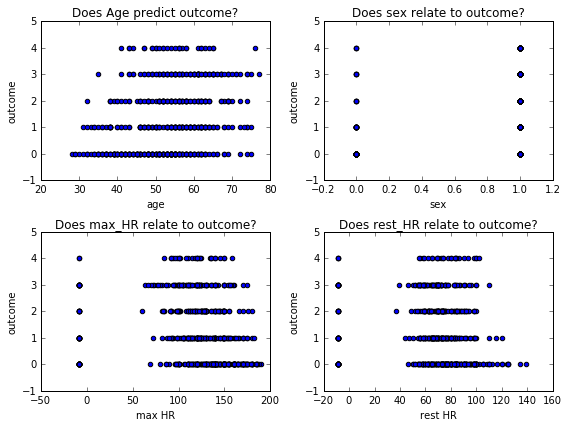

In [10]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(221)
ax1.scatter(df.age,df.outcome)
plt.xlabel('age')
plt.ylabel('outcome')
plt.title('Does Age predict outcome?')

ax2 = fig.add_subplot(222)
ax2.scatter(df.sex,df.outcome)
plt.xlabel('sex')
plt.ylabel('outcome')
plt.title('Does sex relate to outcome?')

ax3 = fig.add_subplot(223)
ax3.scatter(df.max_hr,df.outcome)
plt.xlabel('max HR')
plt.ylabel('outcome')
plt.title('Does max_HR relate to outcome?')

ax4 = fig.add_subplot(224)
ax4.scatter(df.rest_hr,df.outcome)
plt.xlabel('rest HR')
plt.ylabel('outcome')
plt.title('Does rest_HR relate to outcome?')
fig.tight_layout()

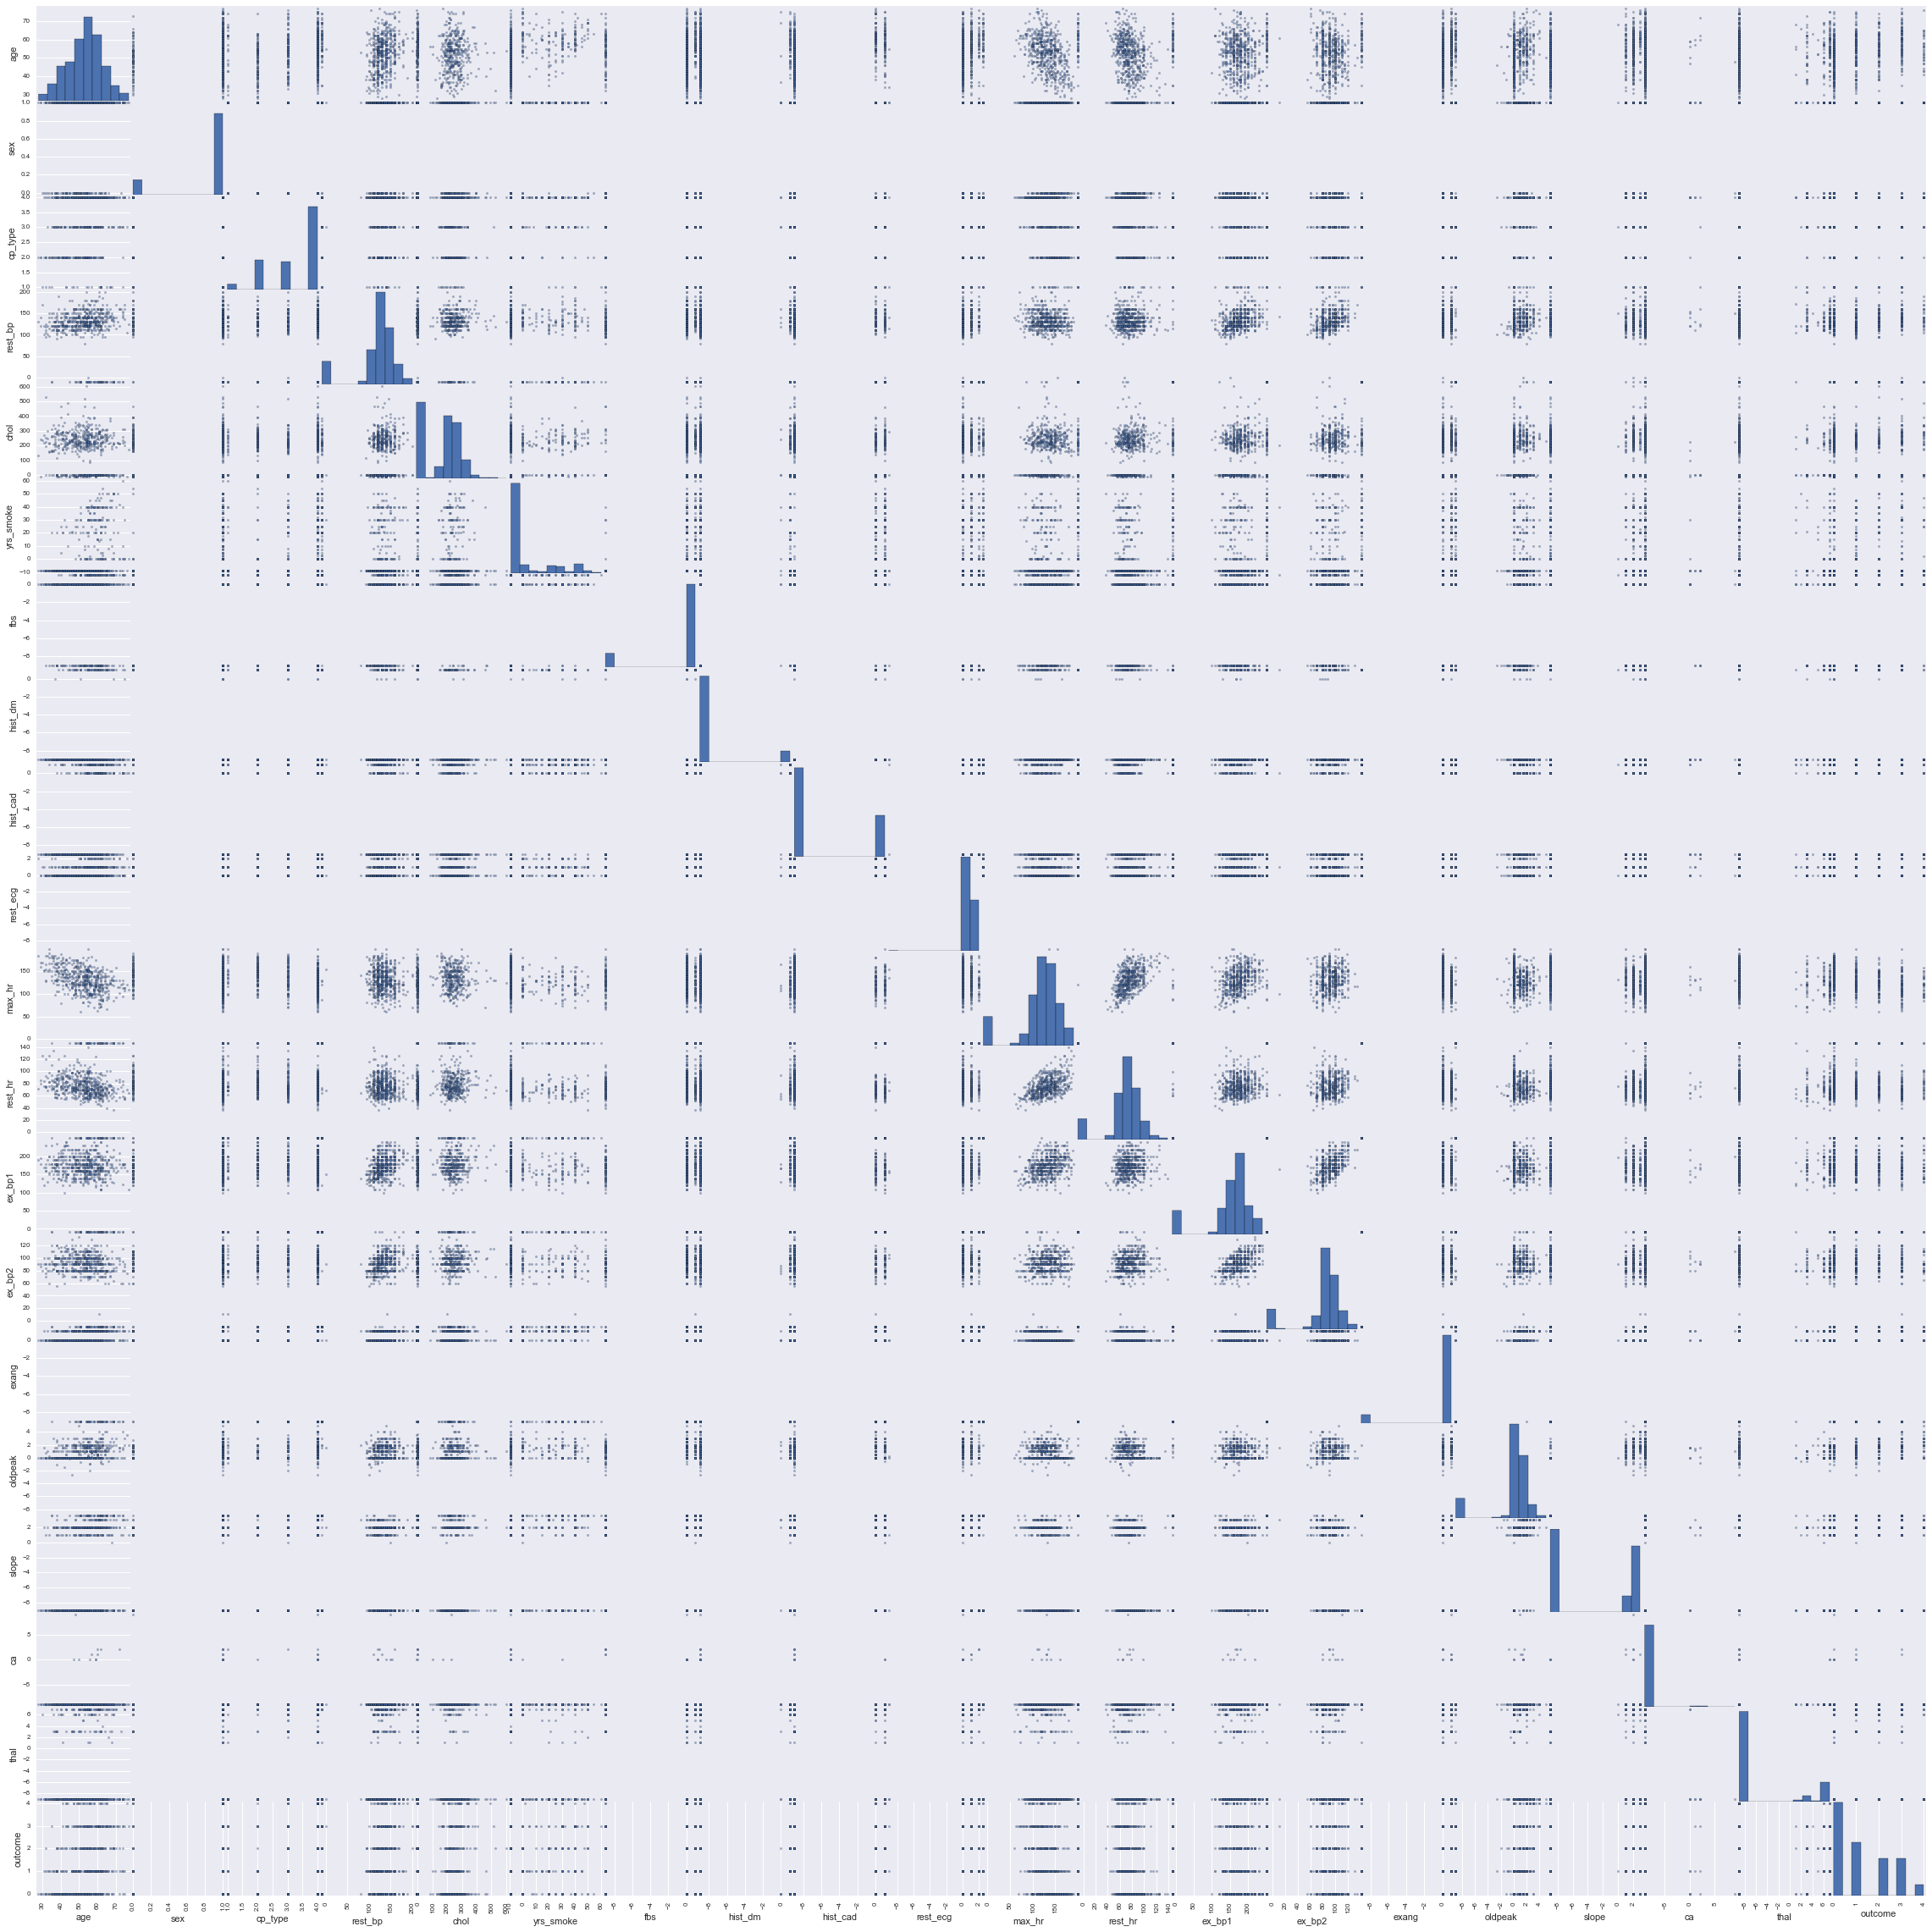

In [12]:
#Plotting one-by-one seems tedious. Lets try something different -
from pandas.tools.plotting import scatter_matrix
plot = scatter_matrix(df, figsize=(40, 40))

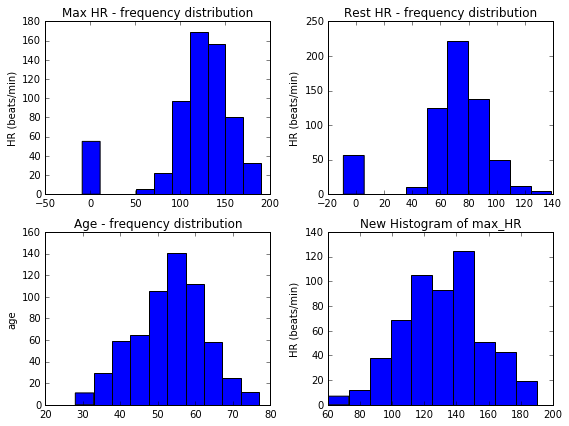

In [16]:
#Now I'm trying to get a feel for the negative values and what the data looks like if I exclude the negative values

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(221)
plt.hist(df.max_hr) # Need to find and drop these 0s 
plt.title('Max HR - frequency distribution')
plt.ylabel('HR (beats/min)')

ax2 = fig.add_subplot(222)
plt.hist(df.rest_hr) # Need to find and drop these 0s 
plt.title('Rest HR - frequency distribution')
plt.ylabel('HR (beats/min)')

ax3 = fig.add_subplot(223)
plt.hist(df.age) #Since I imported SNS above, everything now defaults to seaborn style? how do i fix this?
plt.title('Age - frequency distribution')
plt.ylabel('age')

ax4 = fig.add_subplot(224)
max_hr_pos = df[df.max_hr >= 0] #We don't want to eliminate the whole rows for the negative values, we just want to replace with Nan
plt.hist(max_hr_pos.max_hr)
plt.title('New Histogram of max_HR')
plt.ylabel('HR (beats/min)')

fig.tight_layout()

# Something funny is going on with the HRs - why are there negative numbers? Going to explore this


In [19]:
rest_hr_pos = df[df.rest_hr >= 0] #Again just filtering out the negative ones for graphing purposes

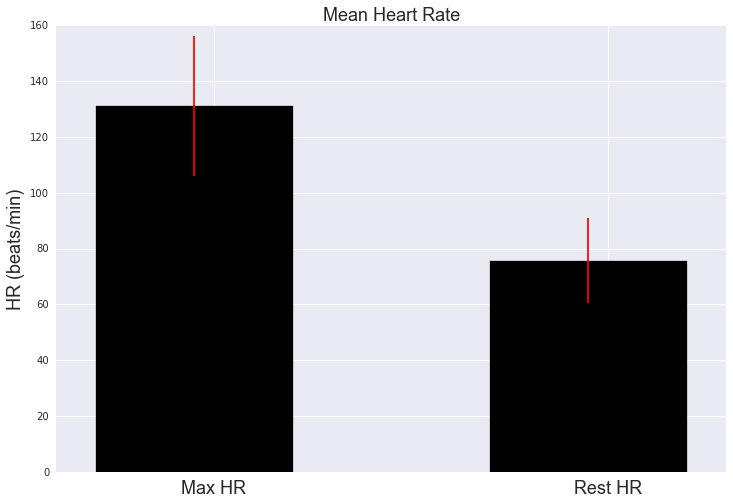

In [20]:
#Now I want to graph the mean MaxHR and RestHR on a bar graph. Im wondering if patients in this cohort have very similar
# rest and max HRs (I hypothesize that there rest heart rates are high and then when they exercise they achieve their max
# heart rate very quickly)
fig = plt.figure(figsize=(12,8)) #Plotting group mean results
ax = fig.add_subplot(111)
width = .5
means = [max_hr_pos['max_hr'].mean(), rest_hr_pos['rest_hr'].mean()]
std = [max_hr_pos['max_hr'].std(), rest_hr_pos['rest_hr'].std()]
ind = np.arange(len(means))
bar_p = plt.bar(ind, means, width, yerr = std, color = 'black', ecolor='red')

ax.set_title('Mean Heart Rate', fontsize=18)
xTickMarks = ['Max HR', 'Rest HR']
ax.set_xticks(ind+.3)
ax.set_xlim(-.1)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=18)
ax.set_ylabel('HR (beats/min)', fontsize=18)
fig.savefig('Max_Rest_HR.png')

/Users/sheena/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/sheena/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


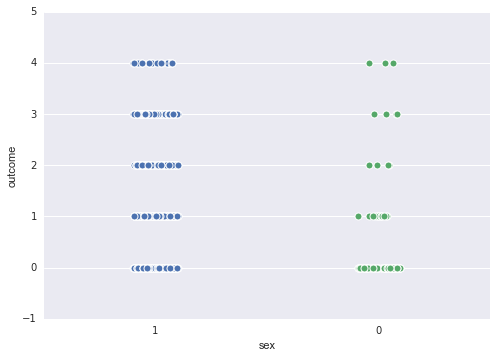

In [18]:
#trying a stripplot for sex - So this shows me that there are more males than females in the higher levels of heart disease 
import seaborn as sns
sns.stripplot(df.sex,df.outcome,jitter=True)

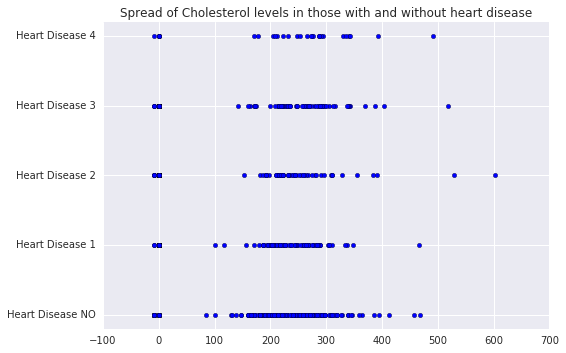

In [21]:
#I'm going to divide the data by outcome group 
#I'm just going to explore if there are obvious differences in these features between the groups. 
chd_pos = df[df.outcome >= 1] 
chd_neg = df[df.outcome == 0]
#Going to look at cholesterol and max HR first
fig = plt.figure()
ax = fig.add_subplot(111)
n=4
ind1=np.arange(pd.value_counts(chd_neg['outcome']))
y = chd_pos['chol'] #, chd_neg['chol']]
x = chd_pos.outcome
ax.scatter(y, x)
ax.scatter(chd_neg['chol'], chd_neg['outcome'], cmap='gray')
ax.set_ylim(-.2,4.2)
ax.set_title('Spread of Cholesterol levels in those with and without heart disease')
yTickMarks = ['', 'Heart Disease NO', 'Heart Disease 1', 'Heart Disease 2', 'Heart Disease 3', 'Heart Disease 4']
ax.set_yticklabels(yTickMarks)
plt.show()

## Task 2: Looking for Null values or missing values - revisited
### Now i've determined there are no null values but there are a lot of "-9"s in lieu of null values. 

In [39]:
#Now I'm exploring some of those columns that seemed to have all negative #s 
#like yrs_smoke, hist_dm, hist_cad, slope, ca, and thal
#I'm going to explore some of this columns with -9s to see if they take up the entire column. 

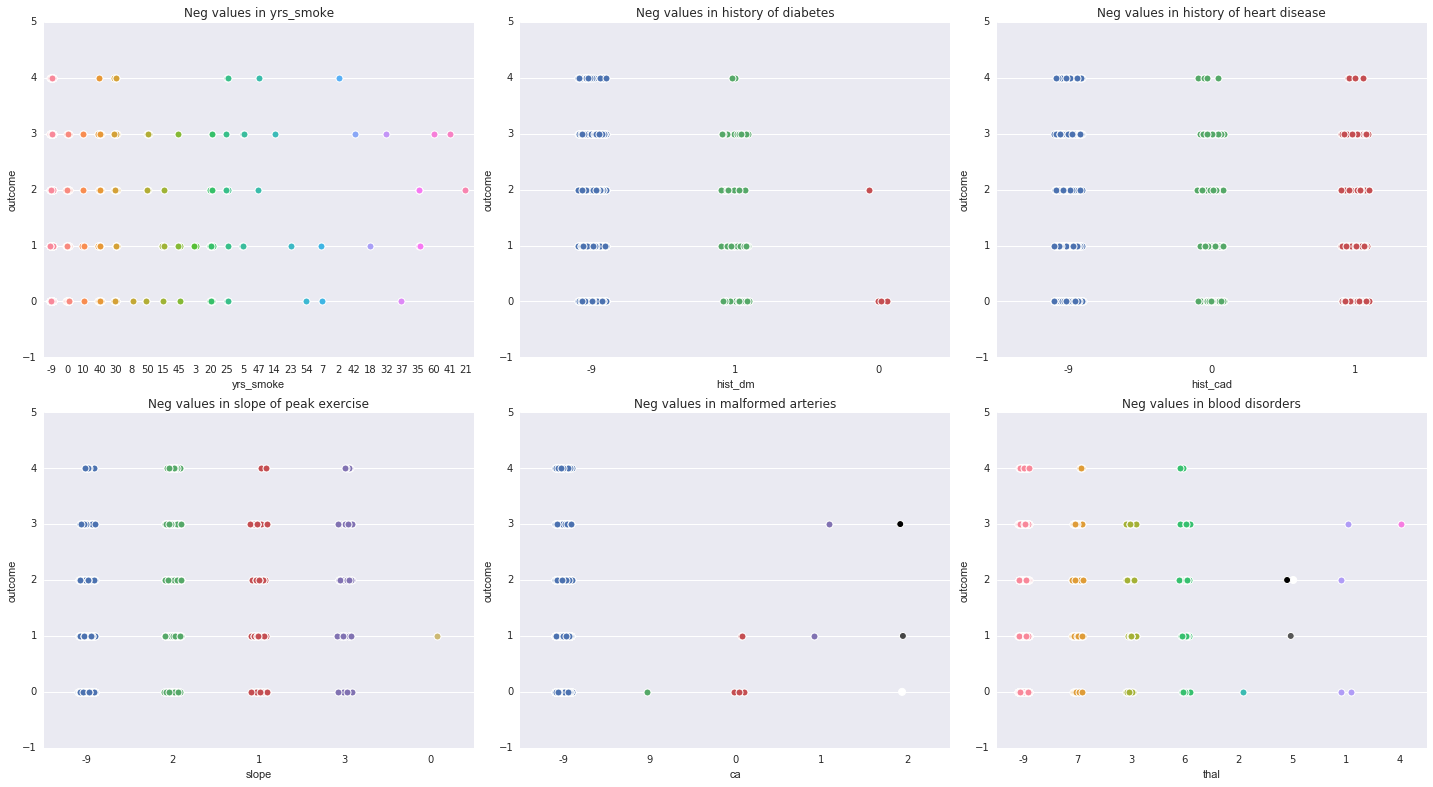

In [19]:
#Exploring columns with neg #s
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
a1 = sns.stripplot(df.yrs_smoke,df.outcome, jitter=True)
plt.xlabel('yrs_smoke')
plt.ylabel('outcome')
plt.title('Neg values in yrs_smoke') #Why isnt x_axis in ascending order?

ax2 = fig.add_subplot(332)
a2 = sns.stripplot(df.hist_dm,df.outcome, jitter=True)
plt.xlabel('hist_dm')
plt.ylabel('outcome')
plt.title('Neg values in history of diabetes')

ax3 = fig.add_subplot(333)
a3 = sns.stripplot(df.hist_cad,df.outcome, jitter=True)
plt.xlabel('hist_cad')
plt.ylabel('outcome')
plt.title('Neg values in history of heart disease')

ax4 = fig.add_subplot(334)
a4 = sns.stripplot(df.slope,df.outcome, jitter=True)
plt.xlabel('slope')
plt.ylabel('outcome')
plt.title('Neg values in slope of peak exercise')
fig.tight_layout()

ax5 = fig.add_subplot(335)
a5 = sns.stripplot(df.ca,df.outcome, jitter=True)
plt.xlabel('ca')
plt.ylabel('outcome')
plt.title('Neg values in malformed arteries')
fig.tight_layout()

ax6 = fig.add_subplot(336)
a6 = sns.stripplot(df.thal,df.outcome, jitter=True)
plt.xlabel('thal')
plt.ylabel('outcome')
plt.title('Neg values in blood disorders')
fig.tight_layout()

In [87]:
df_copy = df.copy()
df_copy[df_copy < 0] = 0 # For now i'm just changing the -9s to 0s so they are more logical for me to think about

## Task4: Check for imbalanced class set. If present, deal with this. 

In [95]:
df.groupby('outcome').size() #Classes are imbalanced, need to deal with this 

outcome
0    247
1    141
2     99
3    100
4     30
dtype: int64

## Task5: Exploring models 

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [162]:
logistic = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
treeclf = DecisionTreeClassifier()
forest = RandomForestClassifier()

###### Cross val scores

In [105]:
from sklearn.cross_validation import cross_val_score
logistic_cv = cross_val_score(logistic, features, target, cv=5).mean()
tree_cv = cross_val_score(treeclf, features, target, cv=5).mean()
forest_cv = cross_val_score(forest, features, target, cv=5).mean()

In [106]:
print """The mean cross val accuracy score (5 folds) is:
%s for a logistic model, 
%s for a decision tree model,and 
%s for a random forest model.""" % (logistic_cv, tree_cv, forest_cv)

The mean cross val accuracy score (5 folds) is:
0.433994085807 for a logistic model, 
0.399834835958 for a decision tree model,and 
0.442019887099 for a random forest model.


In [107]:
#These accuracy scores aren't that great - maybe its because of those 0s. 

###### ROC curves

In [173]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from scipy import interp
from itertools import cycle

In [274]:
def plot_roc(yscore, normalize=False):
    lw = 2
    # Binarize the output
    y1 = label_binarize(target, classes=[0, 1, 2, 3, 4])
    n_classes = y1.shape[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.2, random_state=1)
    #y_score = OneVsRestClassifier(logistic).fit(X_train, y_train).decision_function(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot all ROC curves
    plt.figure(figsize=(6,4))

    colors = cycle(['r', 'g', 'aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right", prop={'size':8})


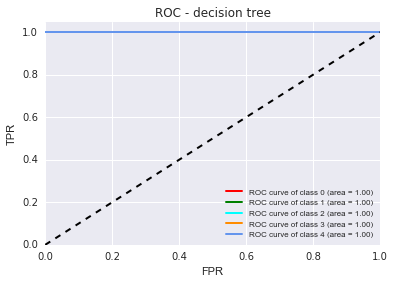

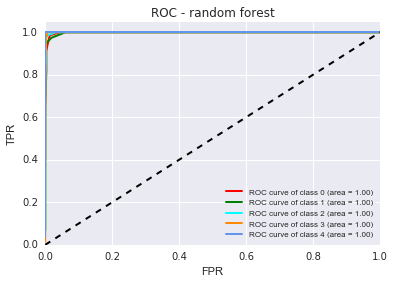

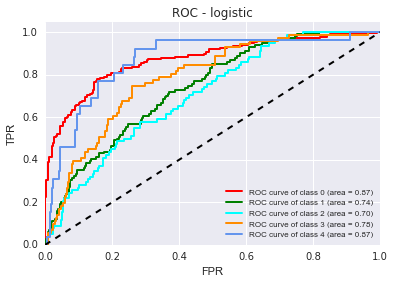

In [275]:
y_score = OneVsRestClassifier(treeclf).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - decision tree')


y_score = OneVsRestClassifier(forest).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - random forest') #not sure why these look so funny!

y_score = OneVsRestClassifier(logistic).fit(X_train, y_train).predict_proba(X_train)
plot_roc(y_score)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - logistic')

###### Training

In [277]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
X = features
y = target

In [278]:
lr_model = logistic.fit(X_train,y_train)
tree_model = treeclf.fit(X_train,y_train)
forest_model = forest.fit(X_train,y_train)

targetlr_predicted_proba = lr_model.predict_proba(features)
targettree_predicted_proba = tree_model.predict_proba(features)
targetforest_predicted_proba = forest_model.predict_proba(features)

###### Confusion matrix

In [217]:
from sklearn.metrics import confusion_matrix

In [283]:
conf_lr = confusion_matrix(y_train, lr_model.predict(X_train)) 

In [280]:
conf_tree = confusion_matrix(y_train, tree_model.predict(X_train))
conf_forest = confusion_matrix(y_train, forest_model.predict(X_train))

In [281]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

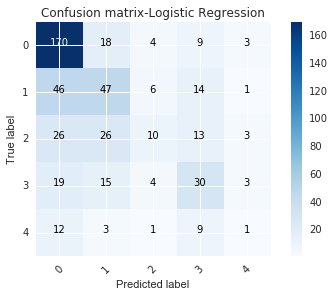

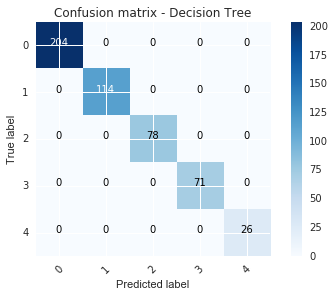

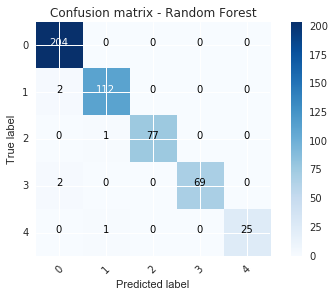

In [282]:
plot_confusion_matrix(conf_lr, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix-Logistic Regression')
plt.show()

plot_confusion_matrix(conf_tree, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix - Decision Tree')
plt.show()

plot_confusion_matrix(conf_forest, classes=[0, 1, 2, 3, 4], title = 'Confusion matrix - Random Forest')
plt.show()

In [ ]:
#From this it seems the logistic regression is clearly the worst but the decision tree and random forest are similar

## Choose model. Hyperparameter optimizaton

###### Model metrics

In [287]:
from sklearn.metrics import (auc, roc_curve, roc_auc_score,
                             accuracy_score, precision_score,
                             recall_score, f1_score, )

In [288]:
def classifier_metrics(model):
    clf = model()
    clf.fit(X_train, y_train)
    print '%30s: %s' % ('Default score (accuracy)', clf.score(X_train, y_train))
    predicted_labels = clf.predict(X_train)
    print '%30s: %s' % ('Precision', precision_score(y_train, predicted_labels))
    print '%30s: %s' % ('Recall', recall_score(y_train, predicted_labels))
    
    try:
        predicted_probabilities = clf.predict_proba(X_train)
        print '%30s: %s' % ('AUC', roc_auc_score(y_train, predicted_probabilities[:, 1]))
    except:
        print '*** predict_proba failed for %s' % model.__name__

In [289]:
logistic.predict_proba(X_train)

array([[ 0.13784363,  0.32608985,  0.3572447 ,  0.14981794,  0.02900388],
       [ 0.04105008,  0.32488721,  0.32480696,  0.24101666,  0.0682391 ],
       [ 0.80202862,  0.09961409,  0.05819458,  0.02797889,  0.01218382],
       ..., 
       [ 0.77304251,  0.11055842,  0.07864999,  0.0237031 ,  0.01404597],
       [ 0.55886877,  0.28735389,  0.08568567,  0.02799966,  0.040092  ],
       [ 0.87446721,  0.06352436,  0.03631681,  0.01212522,  0.0135664 ]])

In [290]:
for model in [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier]:
    print 'Metrics for %s' % model.__name__
    print '=' * 50
    classifier_metrics(model)
    print '\n'

Metrics for LogisticRegression
      Default score (accuracy): 0.574036511156
                     Precision: 0.540273264146
                        Recall: 0.574036511156
*** predict_proba failed for LogisticRegression


Metrics for DecisionTreeClassifier
      Default score (accuracy): 1.0
                     Precision: 1.0
                        Recall: 1.0
*** predict_proba failed for DecisionTreeClassifier


Metrics for RandomForestClassifier
      Default score (accuracy): 0.993914807302
                     Precision: 0.993954193663
                        Recall: 0.993914807302
*** predict_proba failed for RandomForestClassifier




/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/sheena/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

In [ ]:

## Tuning selected model

In [69]:
#now trying hyperparameter optimization

PARAMETERS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]}
SCORING = 'mean_squared_error'

from sklearn import grid_search

#Grid Search
model = DecisionTreeClassifier()
clf = grid_search.GridSearchCV(model, PARAMETERS, scoring=SCORING, verbose=True, n_jobs=1)
clf.fit(X, y)

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_
print np.sqrt(-clf.best_score_)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   10.3s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   14.1s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   18.7s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   23.1s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   29.0s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   33.9s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=4, max_leaf_nodes=6, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
-1.64667747164
1.28322931374


[Parallel(n_jobs=1)]: Done 6912 out of 6912 | elapsed:   38.8s finished


#### Task2 - Revisited: Look for NaNs or missing values. Missing value imputation if needed. 

#### Task4 - Revisited: Check for imbalanced class set. If present, deal with this. 

In [ ]:
#### Task6: Hyperparameter optimization - fine tuning the selected model.
#### Task7: Test the selected model